In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import misc
import random

from config import settings, settings2
from visual_generator import VisualGenerator
from query_recorder import Recorder

In [2]:
visualizer1 = VisualGenerator(settings)
visualizer2 = VisualGenerator(settings2)
recorder = Recorder()

/home/ubuntu/sdg/train/
/home/ubuntu/sdg/train/


In [3]:
# Read in path for all the images
image_list_file = open(settings['activation_root'] + 'input.txt')
image_list1 = []
while True:
    path = image_list_file.readline()
    if not path:
        break
    image_list1.append(path.strip())
    
image_list_file = open(settings2['activation_root'] + 'input.txt')
image_list2 = []
while True:
    path = image_list_file.readline()
    if not path:
        break
    image_list2.append(path.strip())

In [4]:
layers = ['conv4', 'conv5']
layer_lut = []
activation_list = []
size_sum = 0
for layer in layers:
    activation_list.append(np.load(settings['activation_root']  + layer + '.npy'))
    size_sum += activation_list[-1].shape[1]
    layer_lut.append(size_sum)
activation1 = np.concatenate(activation_list, 1)

activation_list = []
for layer in layers:
    activation_list.append(np.load(settings2['activation_root']  + layer + '.npy'))
activation2 = np.concatenate(activation_list, 1)
print(layer_lut)

[384, 640]


In [5]:
# Normalize activations
avg_activation1 = np.tile(np.sqrt(np.sum(activation1 ** 2, 0)), (len(image_list1), 1))
activation1 = np.divide(activation1, avg_activation1)

avg_activation2 = np.tile(np.sqrt(np.sum(activation2 ** 2, 0)), (len(image_list2), 1))
activation2 = np.divide(activation2, avg_activation2)

In [6]:
def plot_activations1(index):
    plt.imshow(misc.imread(settings['image_root'] + image_list1[index]))
    plt.show()
    nodes = []
    max_nodes = np.argsort(activation1[index, :])[-6:]
    for index in max_nodes:
        for i in range(len(layer_lut)):
            if index < layer_lut[i]:
                layer = layers[i]
                if i == 0:
                    layer_index = index
                else:
                    layer_index = index % layer_lut[i-1]
                break
        nodes.append({'layer': layer, 'index': layer_index})
    fig = plt.figure(figsize=(20, 13))
    plt.imshow(visualizer1.visualize_in_grid(nodes, activation_per_node=6))
    plt.show()
    
def plot_activations2(index):
    plt.imshow(misc.imread(settings2['image_root'] + image_list2[index]))
    plt.show()
    nodes = []
    max_nodes = np.argsort(activation2[index, :])[-6:]
    for index in max_nodes:
        for i in range(len(layer_lut)):
            if index < layer_lut[i]:
                layer = layers[i]
                if i == 0:
                    layer_index = index
                else:
                    layer_index = index % layer_lut[i-1]
                break
        nodes.append({'layer': layer, 'index': layer_index})
    fig = plt.figure(figsize=(20, 13))
    plt.imshow(visualizer2.visualize_in_grid(nodes, activation_per_node=6))
    plt.show()

No sparsity


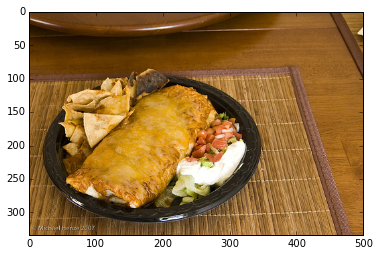

(6, 36, 6, 6, 36)


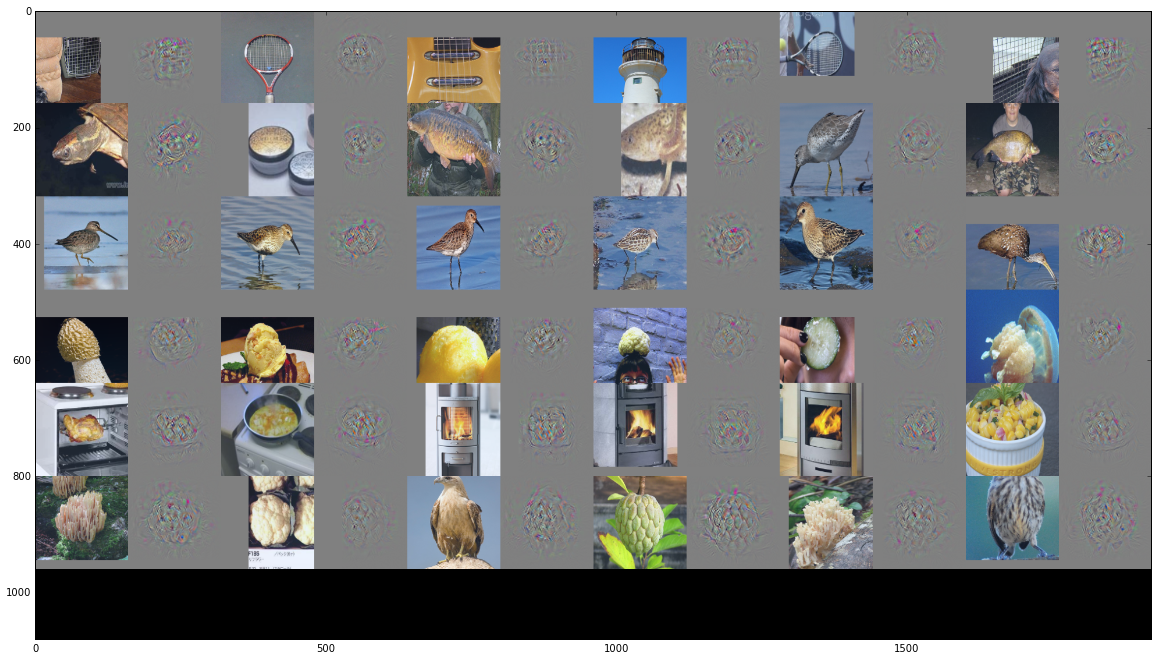

In [23]:
import random
if random.randint(0, 1) == 1:
    print("No sparsity")
    recorder.ask(0)
    plot_activations1(random.randint(0, len(image_list1)-1))
else:
    print("Sparsity")
    recorder.ask(1)
    plot_activations2(random.randint(0, len(image_list2)-1))

In [19]:
recorder.answer(4)

In [ ]:
recorder.close()

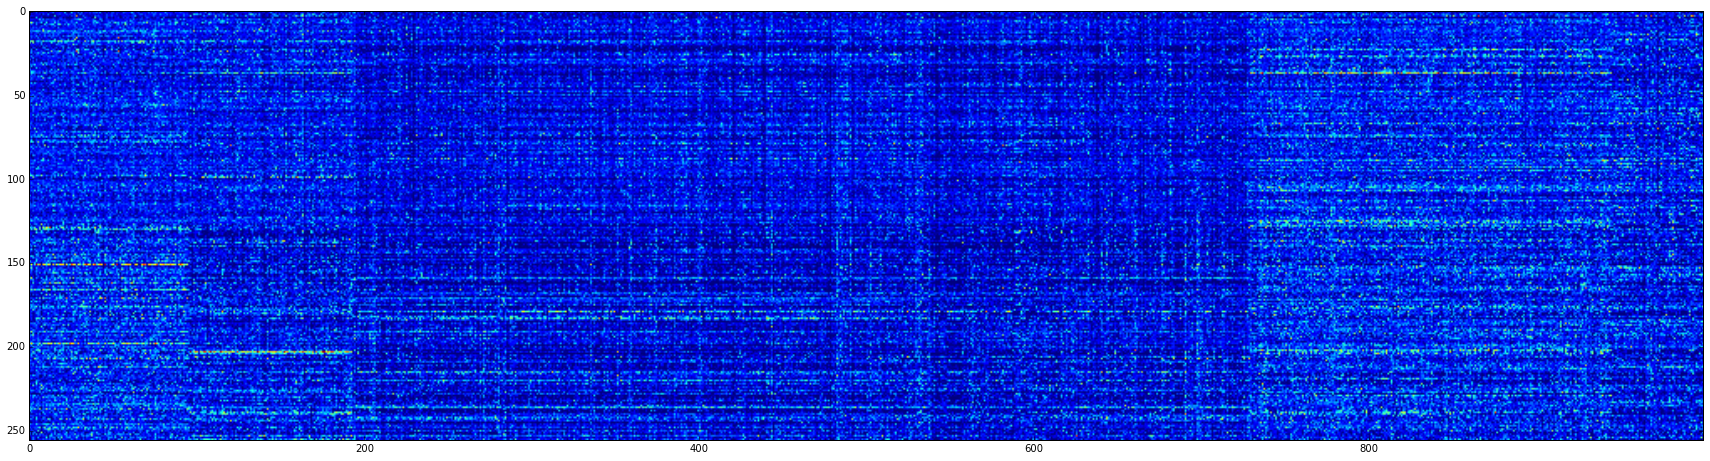

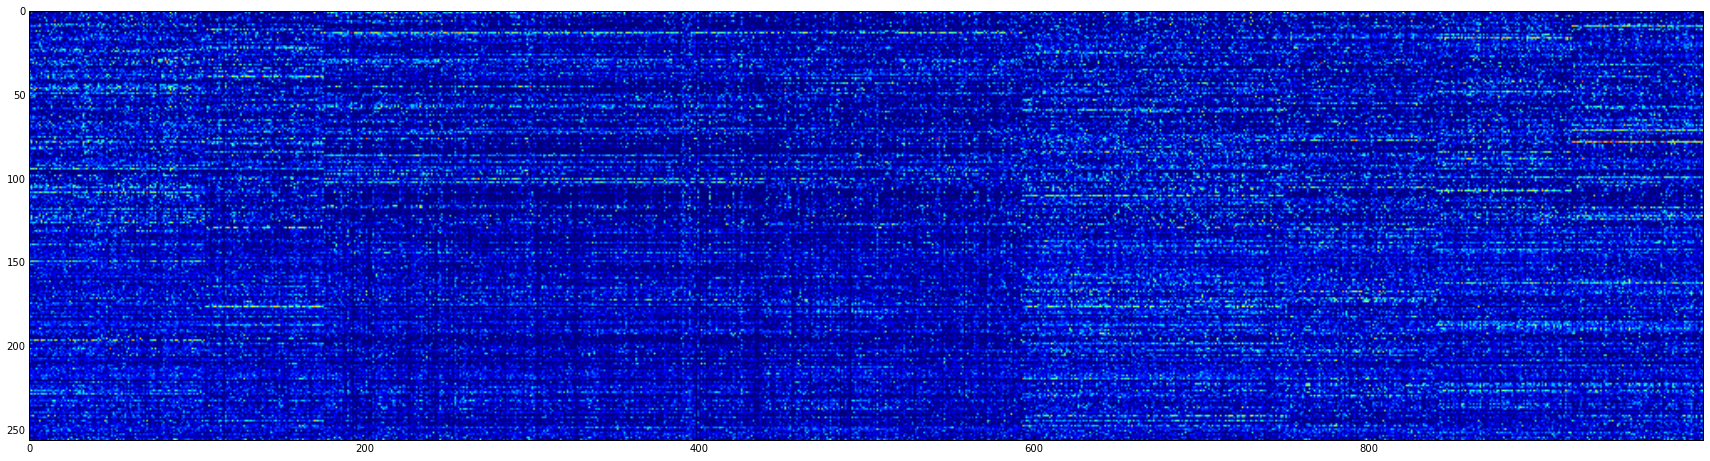

In [32]:
fig = plt.figure(figsize=(30, 23))
plt.imshow(activation1[:1000, 384:].transpose())
plt.show()
fig = plt.figure(figsize=(30, 23))
plt.imshow(activation2[:1000, 384:].transpose())
plt.show()

In [ ]:
visualizer2.image_folder

In [ ]:
visualizer2.node_folder